In [2]:
import numpy
numpy.seterr(invalid='ignore', divide='ignore')
from scipy.signal import argrelextrema
from potential_flow import *
from Joukowski_assign import *
from matplotlib import pyplot, rcParams
%matplotlib inline
# customizing plot parameters
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'

### Problem Statement + Generate Grid

In [2]:
c = 1.0     # parameter on JT
r0 = 1.15                     # radius of circle
x_c, y_c = c-r0, 0.    # center of the circle
z_c = x_c + 1j * y_c   # complex of center
N_r = 100       # radial grids
N_theta = 145   # circumferential grids
theta = numpy.linspace(0., 2*numpy.pi, N_theta)
r = numpy.linspace(r0, 5, N_r)
THETA, R = numpy.meshgrid(theta, r) 

### Joukowski Tranformation

In [3]:
Z = R*numpy.exp(1j*THETA) + z_c

In [4]:
XI = Joukowski_Transform(Z, c)

### Plot the Grid on $Z$ plane & $\xi$ plane

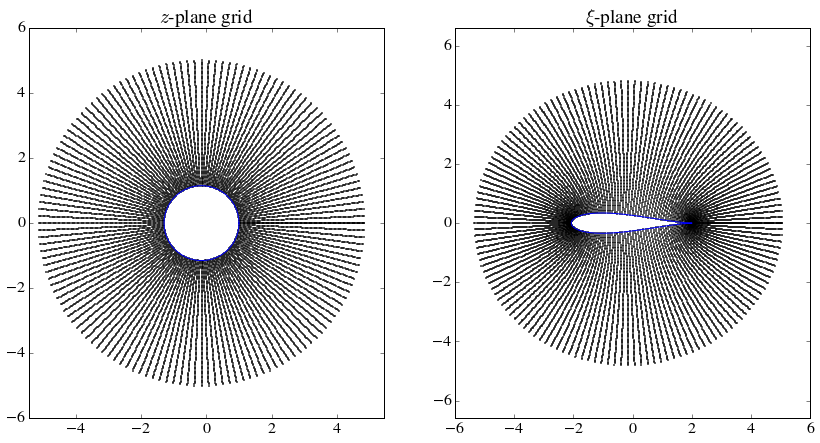

In [5]:
plot_grid(Z, XI)

### Part 1: Potential Flow: No Vortex, No AOA

In [6]:
u_inf = 1.0   # freestream velocity
kappa = r0**2*2*numpy.pi*u_inf     # strength of the doublet
x_doublet, y_doublet = x_c, y_c    # location of the doublet
z_doublet = x_c + 1j*y_c
# no vortex:
gamma = 0.
z_vortex = 0. + 0.j

### Plot the Streamline

In [7]:
psi = eval_psi(u_inf, kappa, gamma, z_doublet, z_vortex, Z)

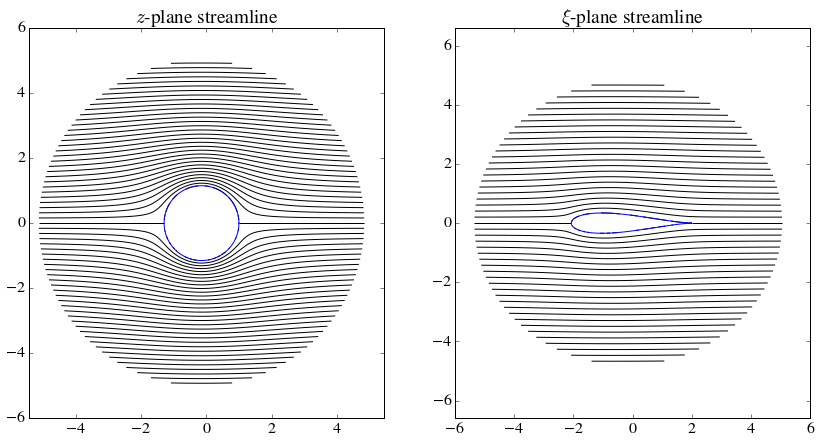

In [8]:
plot_streamline(Z, XI, psi)

### Velocity Vector

In [9]:
w_z = eval_vel(u_inf, kappa, gamma, z_doublet, z_vortex, Z)

In [10]:
# the dxi_dz[0,0] is zero, which causes the Warning"
dxi_dz = 1- (c/Z)**2
w_xi = w_z / dxi_dz
#w_xi = vel_trans(c, Z, w_z)

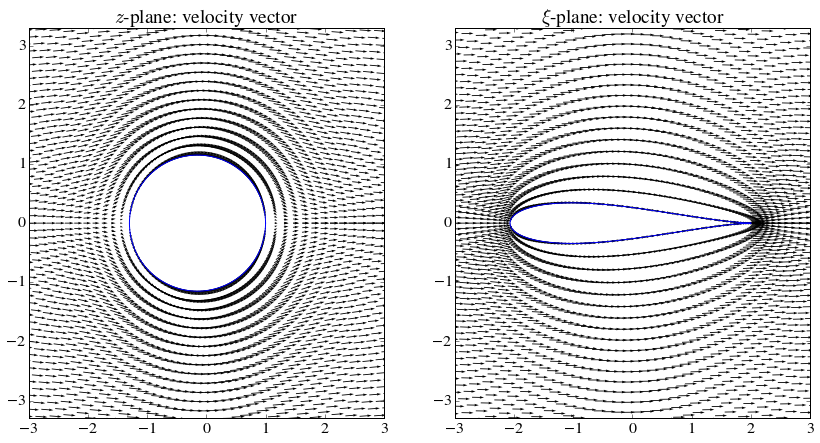

In [11]:
step = 4
plot_vel(Z, XI, w_z, w_xi, step)

### Pressure Coef

In [12]:
cp_z = eval_cp(w_z, u_inf)
cp_xi = eval_cp(w_xi, u_inf)

In [13]:
# the cp[0,0] is inf
print cp_xi[0,1:-1].real.min()

-0.687755674092


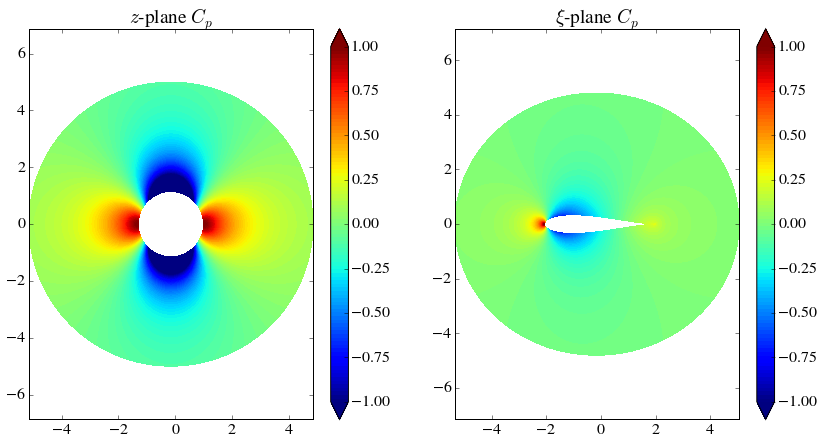

In [14]:
plot_cp(Z, XI, cp_z, cp_xi)

### Part 2: Potential Flow: No Vortex, with AOA = 20 deg

In [15]:
aoa = 20./180 * numpy.pi
Z_prime = Rotate(Z, z_c, aoa)
# after rotation: doublet is at new origin, kappa holds the same
z_prime_doublet = 0.0 + 0.0j
# still no vortex
gamma = 0.0
z_prime_vortex = 0.0 + 0.0j

### Plot the Streamline

In [16]:
psi = eval_psi(u_inf, kappa, gamma, z_prime_doublet, z_prime_vortex, Z_prime)

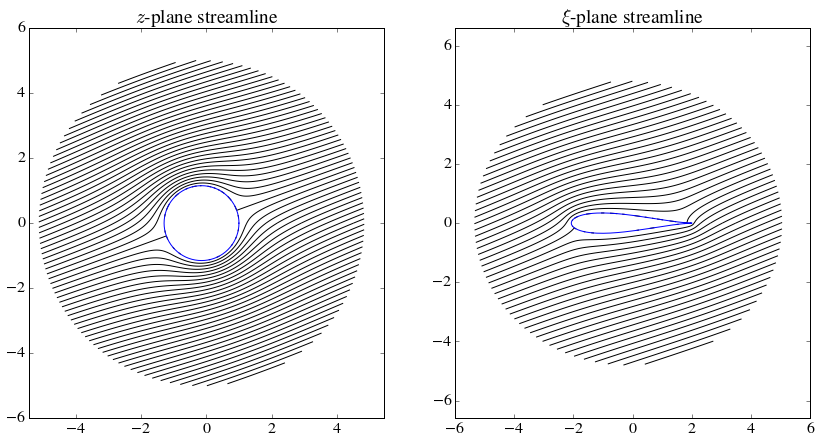

In [17]:
plot_streamline(Z, XI, psi)

### Plot Velocity Vector

In [18]:
w_z_prime = eval_vel(u_inf, kappa, gamma, z_prime_doublet, z_prime_vortex, Z_prime)

In [19]:
# rotate back to z
w_z = w_z_prime * numpy.exp(-1j*aoa)
dxi_dz = 1- (c/Z)**2
w_xi = w_z / dxi_dz
print w_xi[0,49]
# zeta-plane velocity complex
#w_xi = vel_trans(c, Z, w_z)

(1.48306541501-0.0920754950073j)


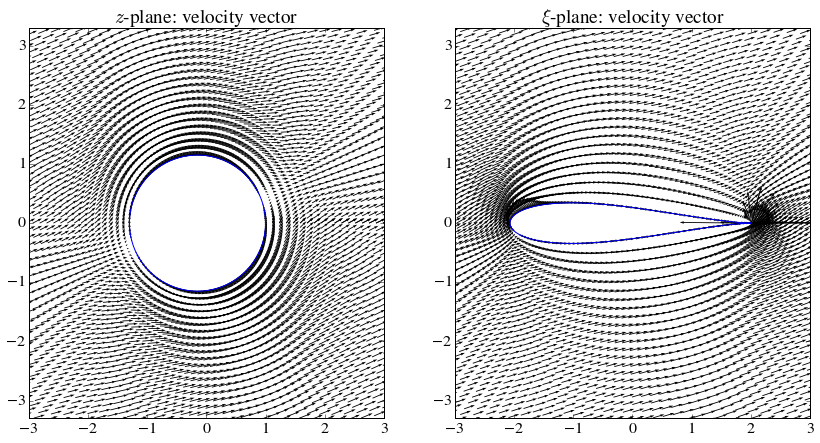

In [20]:
step = 3
plot_vel(Z, XI, w_z, w_xi, step)

### Plot Cp

In [21]:
cp_z = eval_cp(w_z, u_inf)
cp_xi = eval_cp(w_xi, u_inf)
surface_pressure = cp_xi[0,:].real

In [22]:
# find the stagnation point
print argrelextrema(surface_pressure, numpy.greater)
print surface_pressure[74]

(array([ 8, 80]),)
-0.485209916437


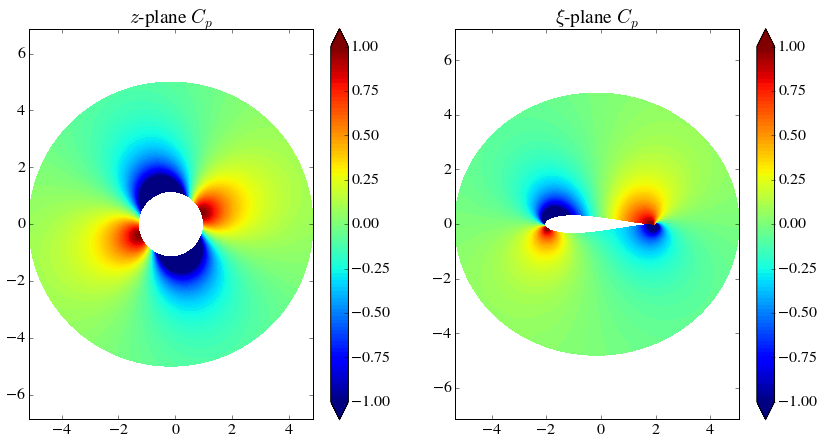

In [23]:
plot_cp(Z, XI, cp_z, cp_xi)

### Part 3: With aoa =20 deg, adding a circulation

In [24]:
# Eval gamma
gamma = - 4 * numpy.pi * r0 * u_inf * numpy.sin(-aoa)
z_prime_vortex = 0.0 + 0.0j
print gamma
rho = 1.0
Lift = rho * u_inf * gamma * numpy.cos(aoa)
print 'by Kutta-Joukowski Theorem: Lift {}'.format(Lift)

4.9426446604
by Kutta-Joukowski Theorem: Lift 4.64456671454


### Streamline

In [25]:
psi = eval_psi(u_inf, kappa, gamma, z_prime_doublet, z_prime_vortex, Z_prime)

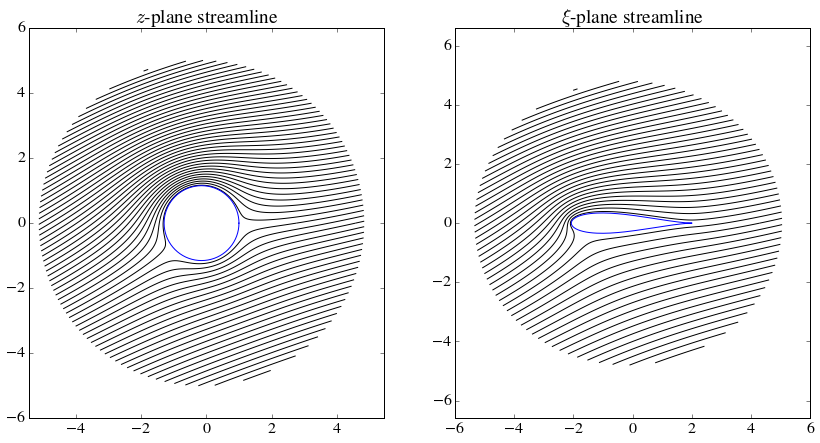

In [26]:
plot_streamline(Z, XI, psi)

### Velocity

In [27]:
w_z_prime = eval_vel(u_inf, kappa, gamma, z_prime_doublet, z_prime_vortex, Z_prime)

In [28]:
w_z = w_z_prime * numpy.exp(-1j*aoa)
# zeta-plane velocity complex
w_xi = vel_trans(c, Z, w_z)

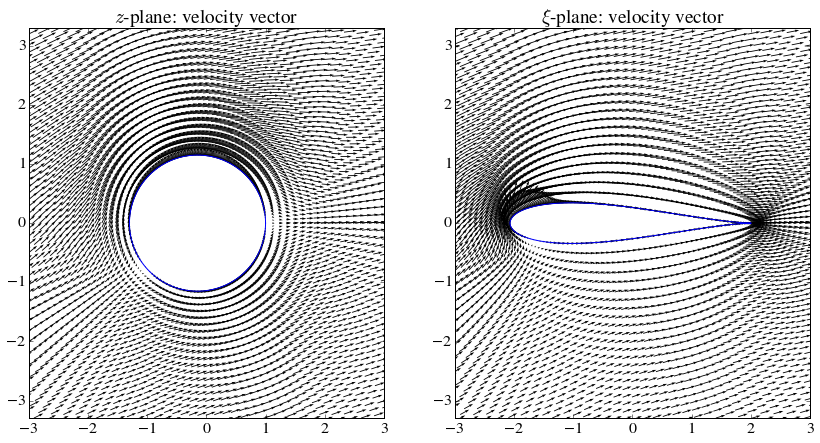

In [29]:
step =3
plot_vel(Z, XI, w_z, w_xi, step)

### Cp

In [30]:
cp_z = eval_cp(w_z, u_inf)
cp_xi = eval_cp(w_xi, u_inf)
dA = 2*numpy.pi*r0/(N_theta-1)
p = 0.5*rho*cp_z[0,:]* u_inf**2
LiftbyIntegral = dA* numpy.dot(p, -numpy.sin(theta))
print LiftbyIntegral.real
DragbyIntegral = dA * numpy.dot(p, numpy.cos(theta))
print DragbyIntegral

4.64456671454
(1.71557314315+0j)


In [31]:
print argrelextrema(surface_pressure, numpy.greater)
print cp_xi[0,110].real

(array([ 8, 80]),)
0.496694672383


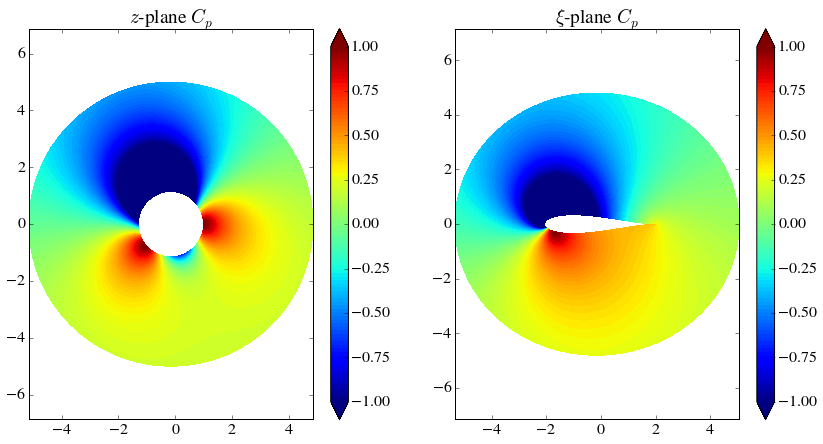

In [32]:
plot_cp(Z, XI, cp_z, cp_xi)